# Prepare stimuli
This notebook prepare all experimental stimuli **before** the experiment

In [85]:
import numpy as np
from PIL import Image

import os
import time
import random
from psychopy import core, visual, event
import matplotlib.pyplot as plt
import gc
#import threading

### Preprocess House

In [39]:
imdir = './images/1279430/'
cat = 'house'
j = 0
for i, f in enumerate(os.listdir(imdir)):
    if f[-3:] == 'jpg':
        im = Image.open(os.path.join(imdir, f)).convert('L')
        if im.size[0]/im.size[1] > 0.8 and im.size[0]/im.size[1] < 1.2:
            im = im.resize([400, 400])
            im.save(os.path.join('./images', cat, f'{cat}_{j}.png'))
            j += 1

### Preprocess Face

In [82]:
imdir = './images/CFD Version 3.0/images/CFD-MR'
cat = 'face'
j = 0
for i, f in enumerate(os.listdir(imdir)):
    if f[-3:] == 'jpg':
        im = Image.open(os.path.join(imdir, f)).convert('L')
        im_arr = np.array(im)
        bkg = (im_arr==255)
        bkg_top = bkg.all(1).sum()
        new_size = im.size[1]
        
        new_im_arr = np.ones([new_size, new_size], dtype = np.uint8)*255
        new_im_arr[: new_size-bkg_top//2, :] = im_arr[bkg_top//2:, im.size[0]//2-new_size//2:im.size[0]//2+new_size//2]

        new_im = Image.fromarray(new_im_arr)
        im = new_im.resize([400, 400])
        im.save(os.path.join('./images', cat, f'{cat}_{j}.png'))
        j += 1

## Scramble them

In [87]:
random.seed(2024)

for cat in ['face', 'house']:
    imdir = f"./images/{cat}/"
    for i, f in enumerate(os.listdir(imdir)):
        im_arr = np.array(Image.open(os.path.join(imdir, f)).convert('L'))
        
        phase_drift = np.random.rand(im.size[0], im.size[1])
        im_kspace = np.fft.fft2(im_arr)
        im_kspace = im_kspace * np.exp(phase_drift*np.pi*1j)
        scrambled = np.fft.ifft2(im_kspace).real
        scrambled = np.uint8((scrambled - np.min(scrambled)) / (np.max(scrambled) - np.min(scrambled)) * 255)
        scrambled = Image.fromarray(scrambled)

        scrambled.save(f'./images/scrambled_{cat}/scrambled_{f}')

In [81]:
im_arr[bkg_top//2:, im.size[0]//2-new_size//2:im.size[0]//2+new_size//2].shape

(1678, 1678)

In [88]:
os.listdir('images/scrambled_face/')

['scrambled_face_86.png',
 'scrambled_face_45.png',
 'scrambled_face_51.png',
 'scrambled_face_79.png',
 'scrambled_face_78.png',
 'scrambled_face_50.png',
 'scrambled_face_44.png',
 'scrambled_face_87.png',
 'scrambled_face_85.png',
 'scrambled_face_52.png',
 'scrambled_face_46.png',
 'scrambled_face_47.png',
 'scrambled_face_53.png',
 'scrambled_face_84.png',
 'scrambled_face_80.png',
 'scrambled_face_57.png',
 'scrambled_face_43.png',
 'scrambled_face_42.png',
 'scrambled_face_56.png',
 'scrambled_face_81.png',
 'scrambled_face_83.png',
 'scrambled_face_68.png',
 'scrambled_face_40.png',
 'scrambled_face_54.png',
 'scrambled_face_55.png',
 'scrambled_face_41.png',
 'scrambled_face_69.png',
 'scrambled_face_82.png',
 'scrambled_face_26.png',
 'scrambled_face_32.png',
 'scrambled_face_1.png',
 'scrambled_face_0.png',
 'scrambled_face_33.png',
 'scrambled_face_27.png',
 'scrambled_face_31.png',
 'scrambled_face_25.png',
 'scrambled_face_19.png',
 'scrambled_face_2.png',
 'scrambled_fac

In [80]:
bkg_top

81

In [75]:
im_arr[bkg_top//2:, im.size[0]//2-new_size//2:im.size[0]//2+new_size//2].shape

(1718, 1718)

In [42]:
im_arr = np.array(im)

In [63]:
im_arr==255

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [58]:
(im_arr==[255, 255, 255])

/var/folders/ck/pj0fhmdj0pz1q2x_6xpj9m2c0000gn/T/ipykernel_84038/4012706920.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (im_arr==[255, 255, 255])


False

In [57]:
bkg = (im_arr==[255, 255, 255]).all(2)
bkg_top = bkg.all(1).sum()

/var/folders/ck/pj0fhmdj0pz1q2x_6xpj9m2c0000gn/T/ipykernel_84038/3077564144.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  bkg = (im_arr==[255, 255, 255]).all(2)


AttributeError: 'bool' object has no attribute 'all'

In [ ]:
im.crop()

In [53]:
bkg_top

168

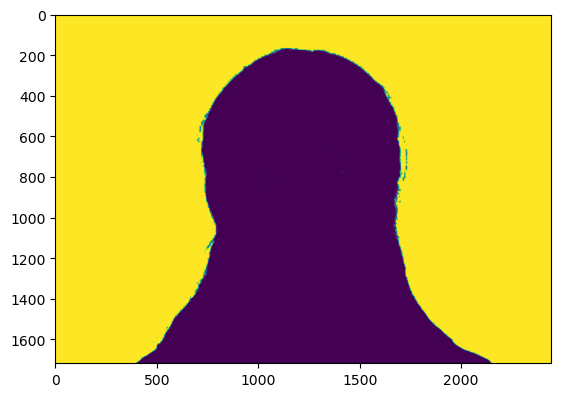

In [49]:
plt.imshow((im_arr==[255, 255, 255]).mean(2))

In [36]:
np.array(im)

NameError: name 'im' is not defined

In [28]:
im.size

(358, 375)

In [22]:
im_arr = np.array(im.resize([400, 400]))

In [26]:
im_arr[im_arr == [255, 255, 255]] = 127

In [ ]:
im.save

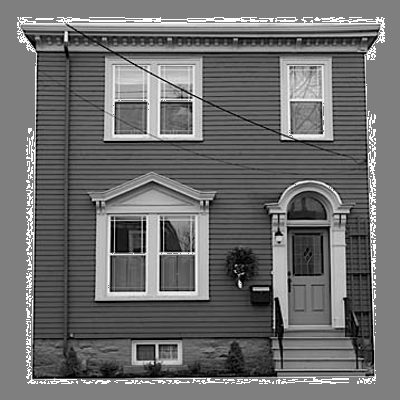

In [27]:
Image.fromarray(im_arr)